# CIFAR-10 Image Classification 🖼️

This is my Computer Vision task using the CIFAR-10 dataset.  
I will train a Convolutional Neural Network (CNN) to classify images into 10 categories like airplane, car, dog, etc.

Steps I will follow:
1. Load the dataset
2. Explore the data
3. Preprocess images
4. Build a CNN model
5. Train the model
6. Evaluate the model


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


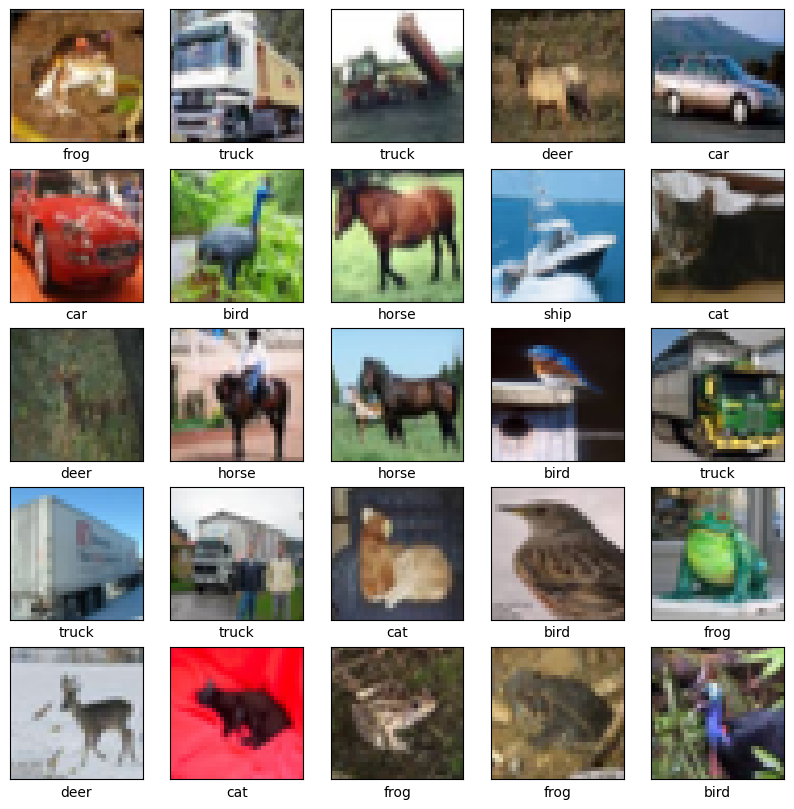

In [4]:
class_names = ['airplane','car','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [7]:
model = models.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.4445 - loss: 1.5226 - val_accuracy: 0.5365 - val_loss: 1.2742
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - accuracy: 0.5864 - loss: 1.1737 - val_accuracy: 0.6137 - val_loss: 1.0983
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.6391 - loss: 1.0229 - val_accuracy: 0.6353 - val_loss: 1.0558
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 25ms/step - accuracy: 0.6774 - loss: 0.9187 - val_accuracy: 0.6787 - val_loss: 0.9154
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.7032 - loss: 0.8455 - val_accuracy: 0.6951 - val_loss: 0.8854
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.7235 - loss: 0.7888 - val_accuracy: 0.6919 - val_loss: 0.8800
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.7406 - loss: 0.7375 - val_accuracy: 0.6981 - val_loss: 0.8692
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 48ms/step - accuracy: 0.7587 

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Final Test Accuracy: {test_acc:.2f}")

313/313 - 3s - 8ms/step - accuracy: 0.7147 - loss: 0.8516
Final Test Accuracy: 0.71


In [13]:
model.save("cifar10_cnn_model.keras")

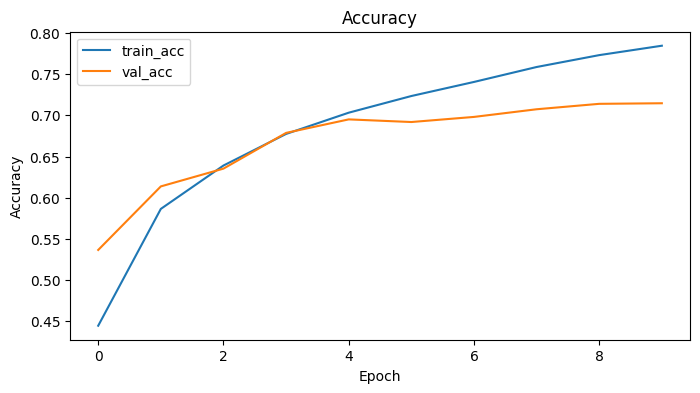

In [16]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.show()

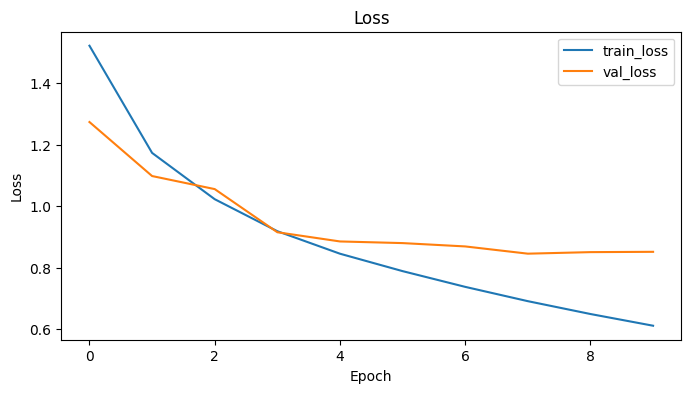

In [17]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.show()

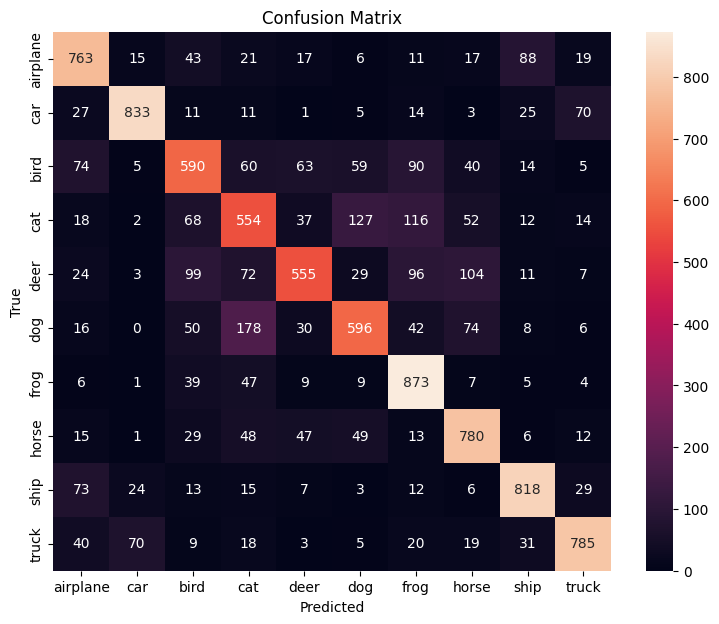

              precision    recall  f1-score   support

    airplane      0.723     0.763     0.742      1000
         car      0.873     0.833     0.853      1000
        bird      0.620     0.590     0.605      1000
         cat      0.541     0.554     0.547      1000
        deer      0.722     0.555     0.627      1000
         dog      0.671     0.596     0.631      1000
        frog      0.678     0.873     0.763      1000
       horse      0.708     0.780     0.742      1000
        ship      0.804     0.818     0.811      1000
       truck      0.825     0.785     0.805      1000

    accuracy                          0.715     10000
   macro avg      0.717     0.715     0.713     10000
weighted avg      0.717     0.715     0.713     10000



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
y_pred_probs = prob_model.predict(x_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

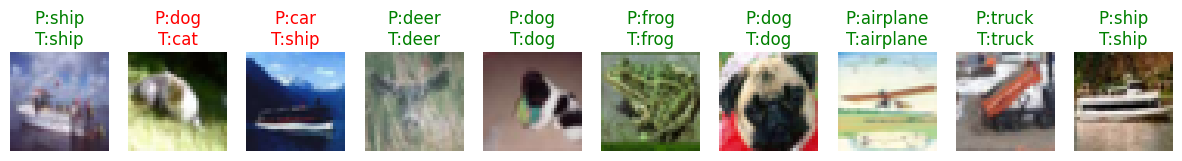

In [19]:
import random
def plot_predictions_random(n=10):
    idxs = random.sample(range(len(x_test)), n)
    plt.figure(figsize=(15,3))
    for i, idx in enumerate(idxs):
        plt.subplot(1, n, i+1)
        plt.imshow(x_test[idx])
        pred = class_names[y_pred[idx]]
        true = class_names[y_true[idx]]
        color = 'green' if pred==true else 'red'
        plt.title(f"P:{pred}\nT:{true}", color=color)
        plt.axis('off')
    plt.show()

plot_predictions_random(10)

In [21]:
import os
os.makedirs("results/figures", exist_ok=True)

plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.savefig("results/figures/confusion_matrix.png", bbox_inches='tight')
plt.close()